This Pymaceuticals data visualization and statistical analysis project investigated the effectiveness of four different drug regimens for the treatment of squamous cell carcinoma (SCC) in laboratory mice. In this study, 248 mice identified with SCC tumor growth were treated through a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens. In this report, data has been effectively represented in filtered summary tables, visualized in numerous chart variations, which included a final linear regression analysis on the effectiveness of the Capomulin treatment. Some observations can be deduced from this data visualization, including:

1. Capomulin and Ramicane shared similar results when observing the ranges of tumor volumes in comparison to Infubinol and Ceftamin which were less effective. Although the visual representation of Capomulin indicates a tighter range of tumor volumes between the data's upper and lower bounds, Ramicane's measurements were more evenly distributed and it's median value (n=36.56) than the median of Capomulin (n=38.12). This could indicate that Ramicane may be a favorable option for SCC treatment in comparison to Capomulin, as generally speaking more tumor volume measurements were centrally located and lower within that drug regimen


2. This analysis showed that there was a strong linear relationship between the volume of the SCC tumors and mouse weight based on the linear regression model and the correlation coefficient. The correlation coefficient was calculated to be 0.84, indicating that most likely as the weight of the mouse increases, the volume of the tumor increases as well. This observation relates back to the study as a mouse is larger in size and weight, it most often would be capable of supporting a tumor growth at a larger magnitude.


3. Capomulin is an effective drug regimen choice for the treatment of squamous cell carcinoma based on it's low variance value (n=24.94) and a visual representation in female mouse s185. Capomulin's variance value is less than half of the variance of other drugs in the study, indicating that it's effect on the reduction of tumor volume is generally consistent. In the line graph of female mouse s185, the volume of the SCC tumor reduced nearly three times in size over the course of the 45 day test period. This is indicative of it's success in tumor reduction if placed on the global market. 

## Observations and Insights 



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset -- PD.MERGE

initial_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
initial_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
len(initial_df)

1893

In [3]:
# Checking the number of mice.
count_mice = len(initial_df["Mouse ID"].unique())
count_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#groupby function?
duplicate_group = initial_df.loc[initial_df.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_group

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#drop_duplicates function
fixed_df = initial_df[initial_df["Mouse ID"] != "g989"]
fixed_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
unique_mice = len(fixed_df["Mouse ID"].unique())
unique_mice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_group_df = fixed_df.groupby(["Drug Regimen"])

tumor_volume_mean = drug_group_df["Tumor Volume (mm3)"].mean()
tumor_volume_median = drug_group_df["Tumor Volume (mm3)"].median()
tumor_volume_var = drug_group_df["Tumor Volume (mm3)"].var()
tumor_volume_std = drug_group_df["Tumor Volume (mm3)"].std()
tumor_volume_sem = drug_group_df["Tumor Volume (mm3)"].sem()

In [9]:
#new summary statistics dataframe
drug_regimen_summary = pd.DataFrame({"Tumor Volume (mm3) Mean": tumor_volume_mean, "Tumor Volume (mm3) Median": tumor_volume_median, "Tumor Volume (mm3) Variance": tumor_volume_var, "Tumor Volume (mm3) Standard Deviation": tumor_volume_std, "Tumor Volume (mm3) SEM": tumor_volume_sem})
drug_regimen_summary

,Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume (mm3) Variance,Tumor Volume (mm3) Standard Deviation,Tumor Volume (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_table = pd.DataFrame(fixed_df.groupby(["Drug Regimen"]) [["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"]))
agg_summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Total Number of Measurements (Timepoints)')

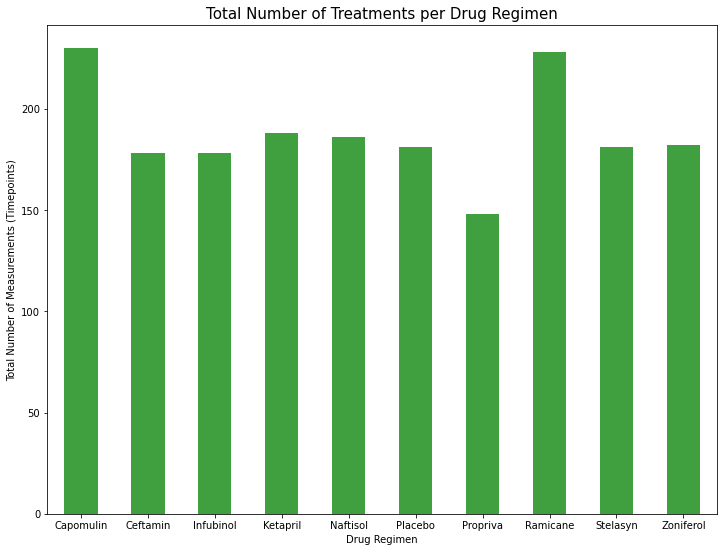

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using PANDAS

#groupby for both type of drug treatment and Mouse ID
grouped_drug_treatments = fixed_df.groupby(["Drug Regimen"])
total_num_measurements = fixed_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

total_num_measurements.plot(kind="bar", figsize = (12,9), color="g", alpha=0.75, legend=False, rot = 360)

#label chart with a title and axis labels 
plt.title("Total Number of Treatments per Drug Regimen", fontsize = 15)
plt.xlabel("Drug Regimen", fontsize = 10)
plt.ylabel("Total Number of Measurements (Timepoints)", fontsize = 10)


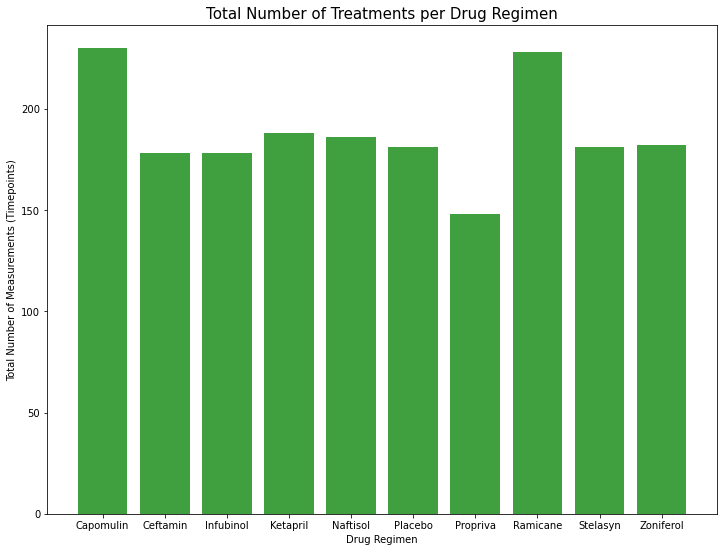

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using PYPLOT
plt.figure(figsize = (12,9))
plt.bar(total_num_measurements.index, total_num_measurements.values, color="g", alpha=0.75)

#title, axis labels
plt.title("Total Number of Treatments per Drug Regimen", fontsize = 15)
plt.xlabel("Drug Regimen", fontsize = 10)
plt.ylabel("Total Number of Measurements (Timepoints)", fontsize = 10)
plt.show()

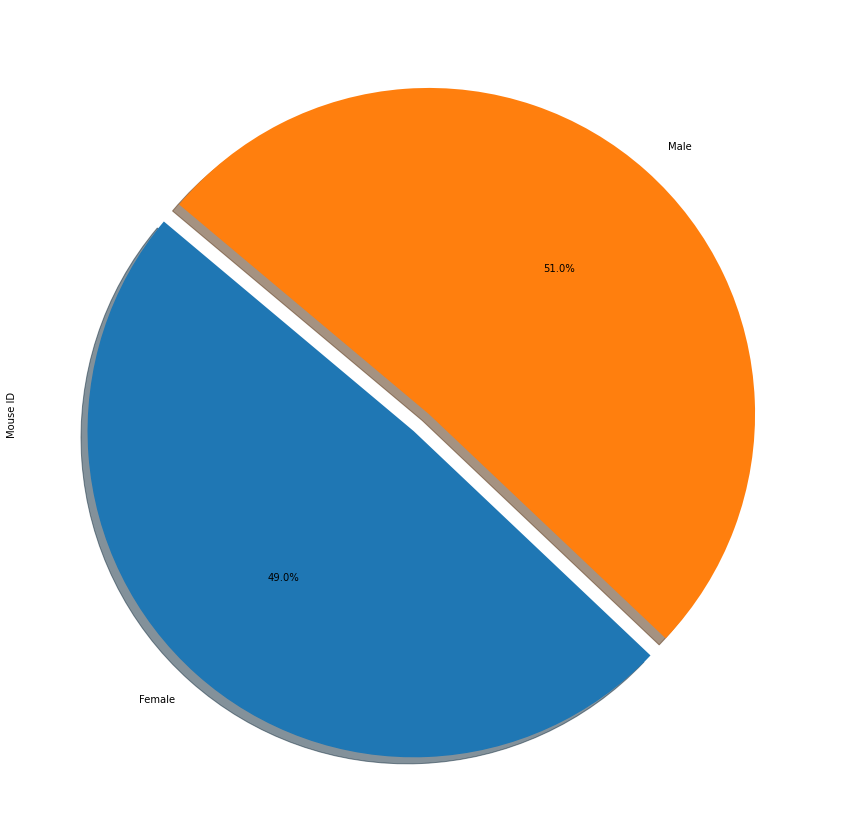

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using PANDAS

#groupby same dataframe for Mouse ID and sex
mouse_sex_grouped = fixed_df.groupby(["Sex"]).count()["Mouse ID"]

mouse_sex_grouped.plot( kind="pie", autopct = "%1.1f%%", figsize = (15,15), startangle = 140, legend = False, explode = (0.07, 0), shadow = True)
plt.show()

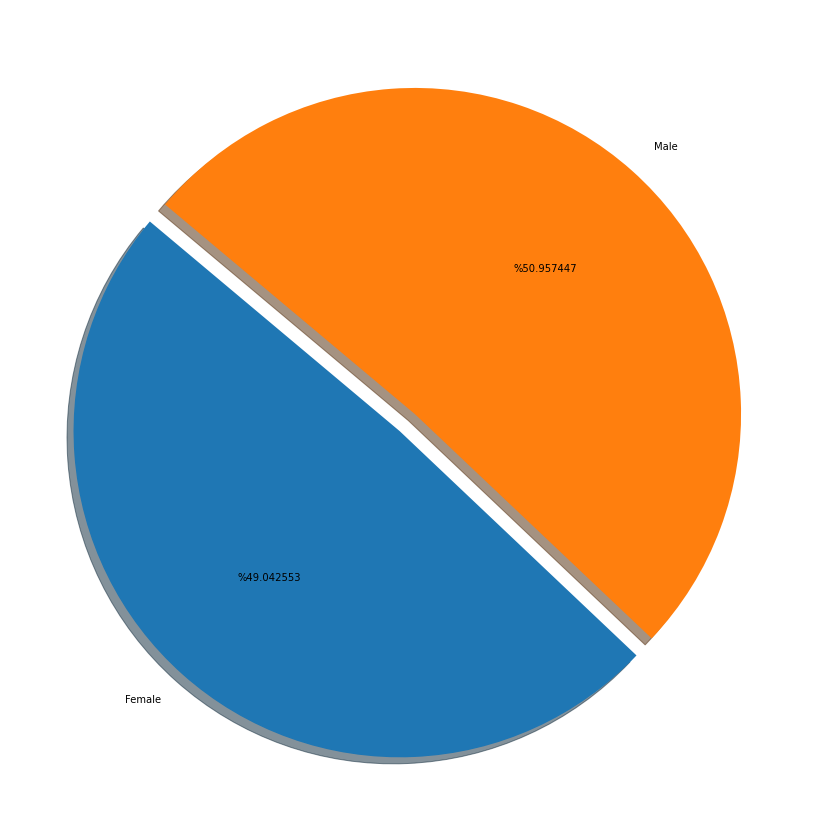

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using PYPLOT
labels = ["Female", "Male"]
explode = (0.07,0)
plt.figure(figsize = (15,15))
plt.pie(mouse_sex_grouped.values, labels = labels, explode = explode, autopct = "%1.1%%f", startangle = 140, shadow = True)
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_timepoint = fixed_df.groupby("Mouse ID").max()["Timepoint"]
type(final_timepoint)
final_timepoint = final_timepoint.reset_index()
final_timepoint
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(final_timepoint, fixed_df, on=["Mouse ID", "Timepoint"])

In [16]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treated_mice = merged_df.loc[merged_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset/ append to list
    tumor_volume_list.append(treated_mice)
    
    
    #Set Quartile values
    quartiles = treated_mice.quantile([0.25, 0.50, 0.75])
    lowerq = quartiles[0.25]
    medianq =quartiles[0.50]
    upperq = quartiles[0.75]
    iqr = upperq = lowerq

    #Print quartile outputs
    print(f"The lower quartile of {drug} is {lowerq}.")
    print(f"The median of {drug} is {medianq}.")
    print(f"The upper quartile of {drug} is {upperq}.")
    print(f"The interquartile range of {drug} is {iqr}.")
    
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values above {upper_bound} could potentially be outliers.")
    print(f"Values below {lower_bound} could potentially be outliers.")
    print("-------------------------------------------------------------------")

The lower quartile of Capomulin is 32.37735684.
The median of Capomulin is 38.125164399999996.
The upper quartile of Capomulin is 32.37735684.
The interquartile range of Capomulin is 32.37735684.
Values above 80.94339209999998 could potentially be outliers.
Values below -16.188678419999995 could potentially be outliers.
-------------------------------------------------------------------
The lower quartile of Ramicane is 31.56046955.
The median of Ramicane is 36.56165229.
The upper quartile of Ramicane is 31.56046955.
The interquartile range of Ramicane is 31.56046955.
Values above 78.90117387500001 could potentially be outliers.
Values below -15.780234775000004 could potentially be outliers.
-------------------------------------------------------------------
The lower quartile of Infubinol is 54.04860769.
The median of Infubinol is 60.16518046.
The upper quartile of Infubinol is 54.04860769.
The interquartile range of Infubinol is 54.04860769.
Values above 135.121519225 could potential

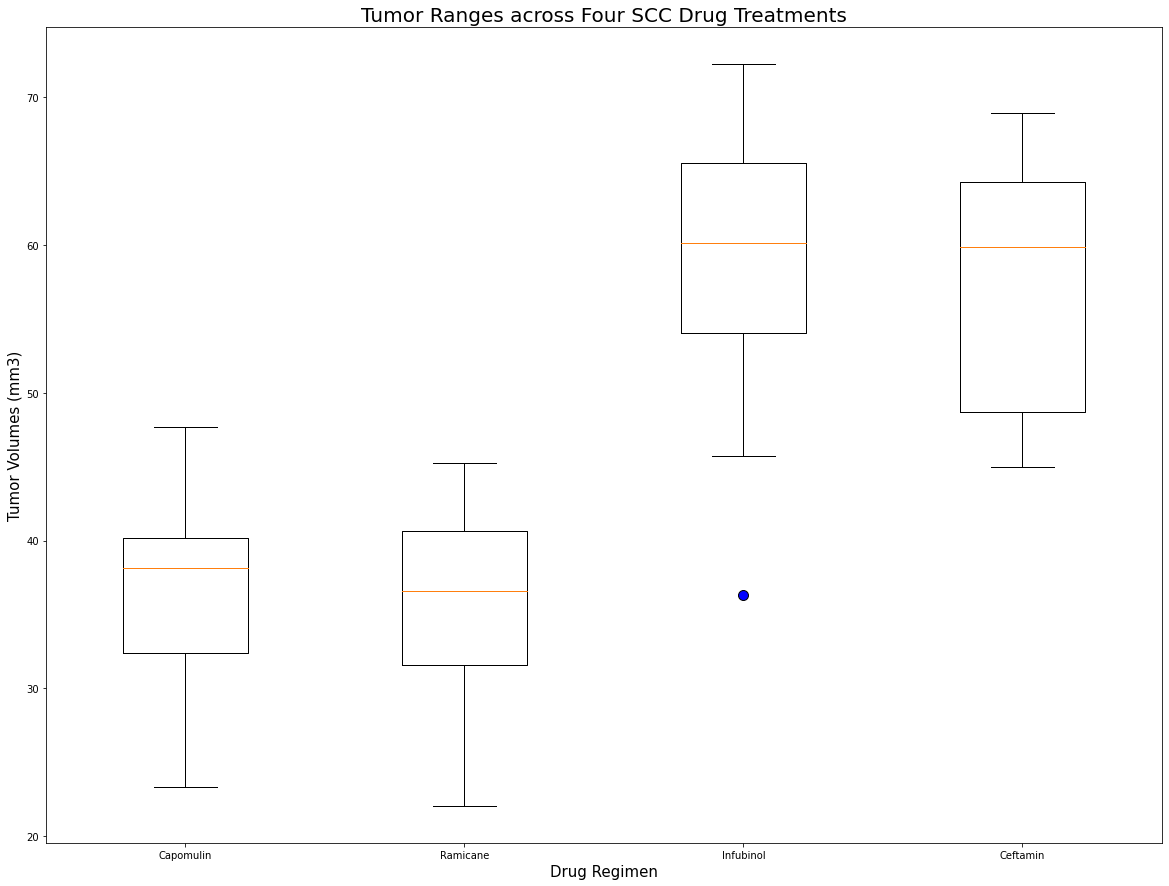

In [17]:
# Generate a box plot of the final tumor volume (max) of each mouse across four regimens of interest
outlier = dict(marker = "o", markerfacecolor = "blue", markersize = 10, markeredgecolor = "black")

plt.figure(figsize = (20,15))

plt.boxplot(tumor_volume_list, labels = drug_regimens, flierprops = outlier)

#Provide associated chart titles & axis labels
plt.title("Tumor Ranges across Four SCC Drug Treatments", fontsize = 20)
plt.xlabel("Drug Regimen", fontsize = 15)
plt.ylabel("Tumor Volumes (mm3)", fontsize =15)
plt.show()

## Line and Scatter Plots

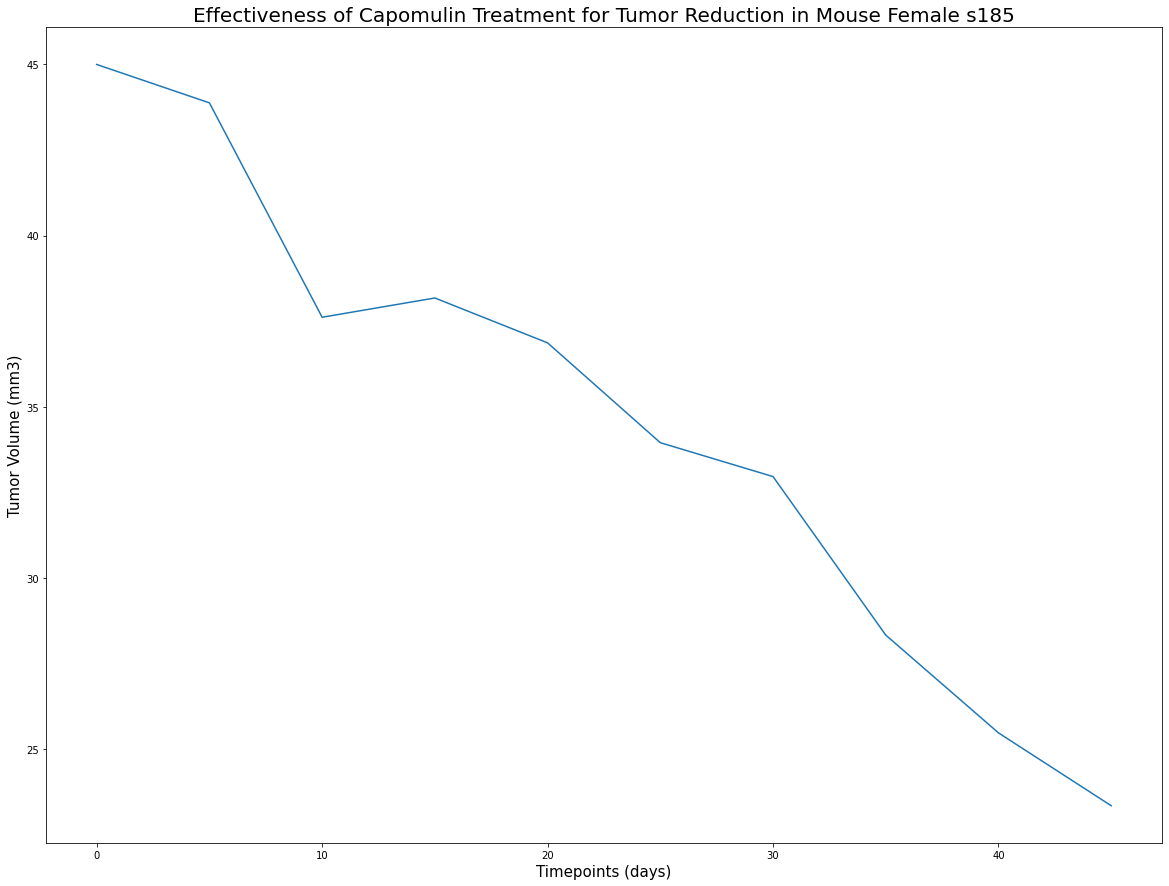

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_treatment = fixed_df.loc[(fixed_df["Drug Regimen"] == "Capomulin")]

treated_mouse_df = fixed_df.loc[fixed_df["Mouse ID"] == "s185", :].reset_index(drop = True)
treated_mouse_df

#variables for tumor volume and timepoint
tumor_vol = treated_mouse_df["Tumor Volume (mm3)"]
timepoint = treated_mouse_df["Timepoint"]

plt.figure(figsize = (20,15))

plt.plot(timepoint, tumor_vol)

#Generate axis labels and chart title
plt.title("Effectiveness of Capomulin Treatment for Tumor Reduction in Mouse Female s185", fontsize = 20)
plt.xlabel("Timepoints (days)", fontsize = 15)
plt.ylabel("Tumor Volume (mm3)", fontsize = 15)
plt.show()

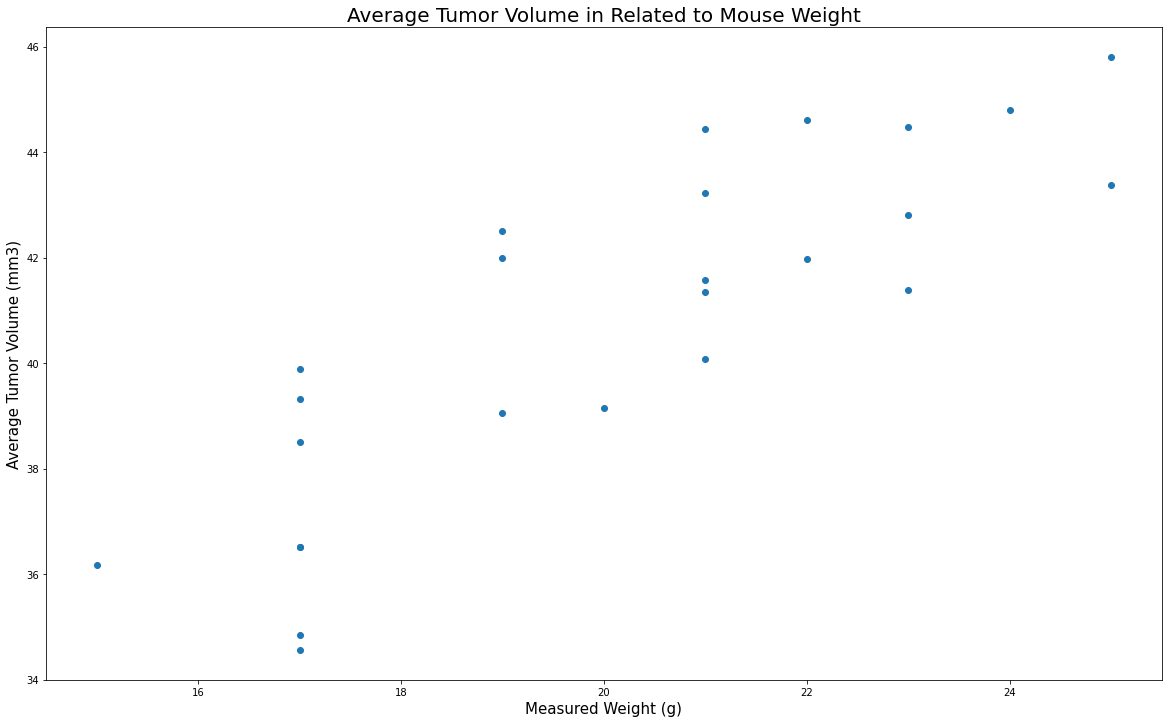

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tumor_avg_capomulin = capomulin_treatment.groupby("Mouse ID").mean()

#mean weight measurements and mean tumor volume sizes
mean_weight = tumor_avg_capomulin["Weight (g)"]
tumor_volume_mean = tumor_avg_capomulin["Tumor Volume (mm3)"]

plt.figure(figsize = (20,12))

plt.scatter(mean_weight, tumor_volume_mean)

#associated axis labels and chart title
plt.title("Average Tumor Volume in Related to Mouse Weight", fontsize = 20)
plt.xlabel("Measured Weight (g)", fontsize = 15)
plt.ylabel("Average Tumor Volume (mm3)", fontsize = 15)
plt.show()

## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between mouse weight and average tumor volume in the Capomulin treatment regimen is: {round(st.pearsonr(mean_weight, tumor_volume_mean)[0], 2)}.")

The correlation coefficient between mouse weight and average tumor volume in the Capomulin treatment regimen is: 0.84.


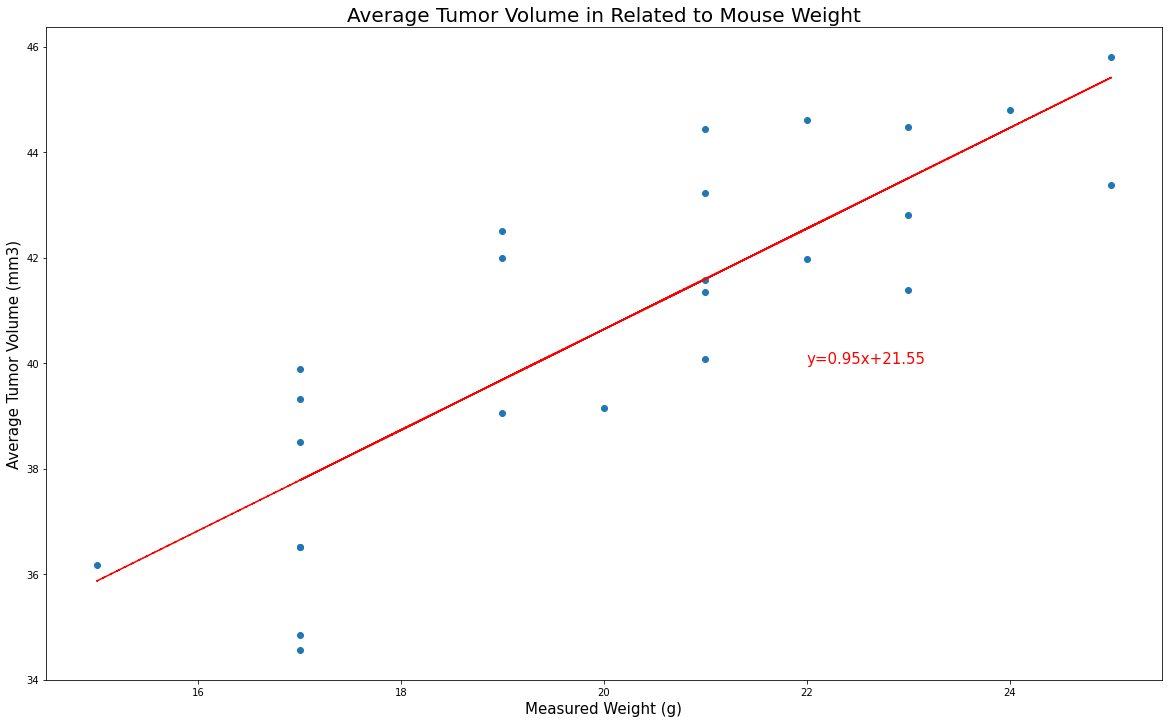

In [21]:
#Linear Regression Model for mouse weight and average tumor volume for the Capomulin regimen
drug_capo_slope, drug_capo_int, dru_capo_r, drug_capo_p, drug_capo_std_err = st.linregress(mean_weight, tumor_volume_mean)

#Equation for average tumor volume based on mouse weight
best_fit_capo = drug_capo_slope * mean_weight + drug_capo_int

#Create y=mx+b equation
equation = "y=" + str(round(drug_capo_slope, 2)) + "x+" + str(round(drug_capo_int, 2))

#Repeat code for scatter plot to include line of best fit and y=mx+b equation
tumor_avg_capomulin = capomulin_treatment.groupby("Mouse ID").mean()

#mean weight measurements and mean tumor volume sizes
mean_weight = tumor_avg_capomulin["Weight (g)"]
tumor_volume_mean = tumor_avg_capomulin["Tumor Volume (mm3)"]

plt.figure(figsize = (20,12))

plt.scatter(mean_weight, tumor_volume_mean)

#Add in linear regression/best fit line
plt.plot(mean_weight, best_fit_capo, "--", color = "red")

#Add in y=mx+b equation
plt.annotate(equation, (22,40), fontsize = 15, color = "red")

#associated axis labels and chart title
plt.title("Average Tumor Volume in Related to Mouse Weight", fontsize = 20)
plt.xlabel("Measured Weight (g)", fontsize = 15)
plt.ylabel("Average Tumor Volume (mm3)", fontsize = 15)
plt.show()